In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class SimpleRegression:
    
    def __init__(self):
        self.m = None
        self.c = None
    def fit(self, X_train, Y_train):
        
        numerator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            numerator += (X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean())
            denominator += (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = numerator/denominator
        self.c = Y_train.mean() - (self.m*X_train.mean())
        
        print(self.m)
        print(self.c)
        
    def predict(self, X_test):
        
        return self.m*X_test+self.c

In [4]:
df = pd.read_csv('onlinedataset.csv')

In [5]:
df.head()

,Gender,Age Range,Head Size,Brain Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
X = df.iloc[:, 2].values
y = df.iloc[:, 3].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
Y_test

array([1357, 1168, 1318, 1400, 1243, 1635, 1320, 1180, 1340, 1105, 1340,
       1334, 1290, 1235, 1220, 1235, 1295, 1310, 1320, 1522, 1207, 1305,
       1240, 1312, 1250, 1120, 1346, 1270, 1135, 1220, 1265, 1362, 1440,
       1290, 1170, 1370, 1505, 1280, 1470, 1252, 1192, 1620, 1425, 1400,
       1310, 1355, 1420, 1390])

In [8]:
lr = SimpleRegression()

In [9]:
lr.fit(X_train, Y_train)

0.2594065813511456
337.24135306995163


In [10]:
print(lr.predict(4177))

1420.7826433736868


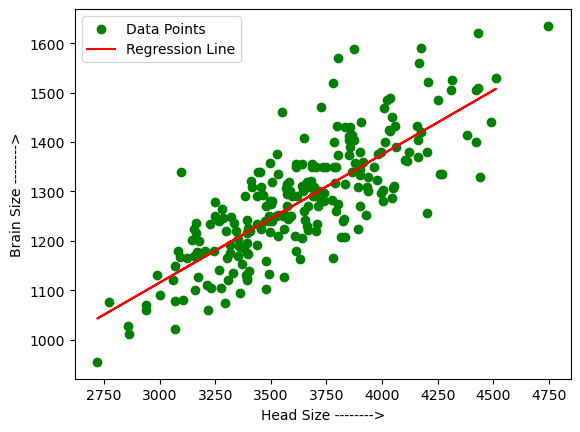

In [11]:
plt.scatter(df['Head Size'], df['Brain Weight'], color = 'green', label = "Data Points")
plt.plot(X_train, lr.predict(X_train), color = 'red',label = "Regression Line")
plt.xlabel('Head Size -------->')
plt.ylabel('Brain Size -------->')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_pred

array([1343.22007555, 1138.80768944, 1319.61407665, 1377.98055745,
       1184.72265434, 1568.64439474, 1265.91691431, 1179.27511614,
       1230.37821266, 1187.31672016, 1339.32897683, 1349.70524008,
       1269.54860645, 1298.86155014, 1219.74254283, 1228.56236659,
       1263.58225507, 1223.11482838, 1246.46142071, 1428.8242474 ,
       1326.61805434, 1294.97045142, 1329.21212016, 1388.61622729,
       1251.39014575, 1216.88907043, 1348.66761376, 1299.63976988,
       1200.80586239, 1298.08333039, 1187.83553332, 1404.44002875,
       1350.74286641, 1214.81381778, 1155.92852381, 1416.37273149,
       1484.59666239, 1307.42196732, 1304.04968177, 1252.94658524,
       1229.34058634, 1486.41250846, 1383.16868908, 1319.09526348,
       1233.23168506, 1281.48130919, 1420.26383021, 1338.03194392])

In [15]:
Y_test

array([1357, 1168, 1318, 1400, 1243, 1635, 1320, 1180, 1340, 1105, 1340,
       1334, 1290, 1235, 1220, 1235, 1295, 1310, 1320, 1522, 1207, 1305,
       1240, 1312, 1250, 1120, 1346, 1270, 1135, 1220, 1265, 1362, 1440,
       1290, 1170, 1370, 1505, 1280, 1470, 1252, 1192, 1620, 1425, 1400,
       1310, 1355, 1420, 1390])

In [16]:
print("Mean Absolute Error ::" ,mean_absolute_error(Y_test,y_pred))

Mean Absolute Error :: 51.16116074575538


In [17]:
print("Mean Squared Error ::" ,mean_squared_error(Y_test,y_pred))

Mean Squared Error :: 4195.115783896061


In [18]:
print("Root Mean Squared Error ::" ,np.sqrt(mean_squared_error(Y_test,y_pred)))

Root Mean Squared Error :: 64.76971347702613


In [19]:
print("R2 Score ::" ,r2_score(Y_test,y_pred))

R2 Score :: 0.6793647592908127


In [20]:
r2 = r2_score(Y_test,y_pred)

In [21]:
X_test.shape

(48,)

In [22]:
adj = 1 - ((1-r2)*(48-1)/(48-1-1))
adj

0.6723944279710479